In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style(style = 'whitegrid')

In [48]:
df=pd.read_csv('loan_data.csv')
nrow, ncol = df.shape
nrow, ncol

(9578, 14)

In [49]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None


In [51]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card


In [63]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [52]:
df_cat['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [53]:
df_cat['purpose'].nunique()

7

In [54]:
df_cat['purpose'].isnull().sum()

0

In [55]:
df_cat['purpose'].isnull().sum()/ nrow

#Let's multiple by 100 and keep only 1 decimal places
(df_cat['purpose'].isnull().sum()/ nrow).round(3)*100

0.0

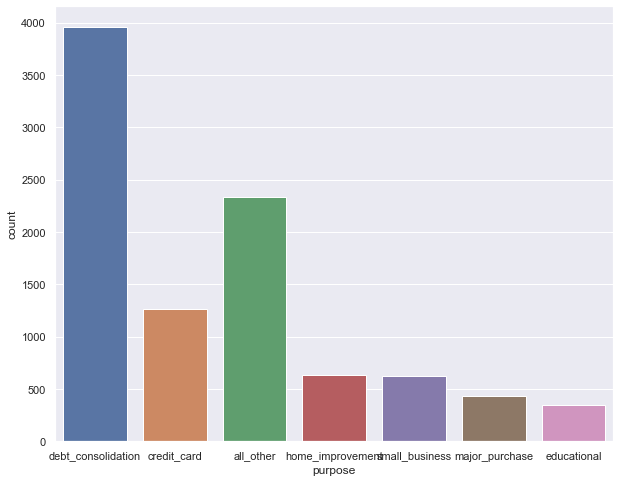

In [75]:
sns.countplot(data = df, x = 'purpose')

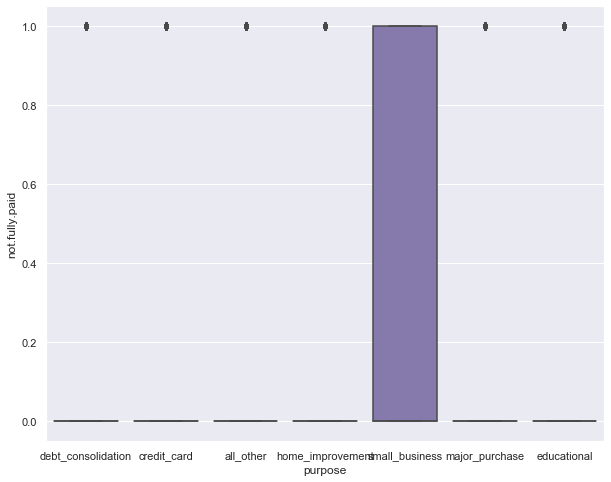

In [74]:
sns.boxplot(data = df, x='purpose', y='not.fully.paid')

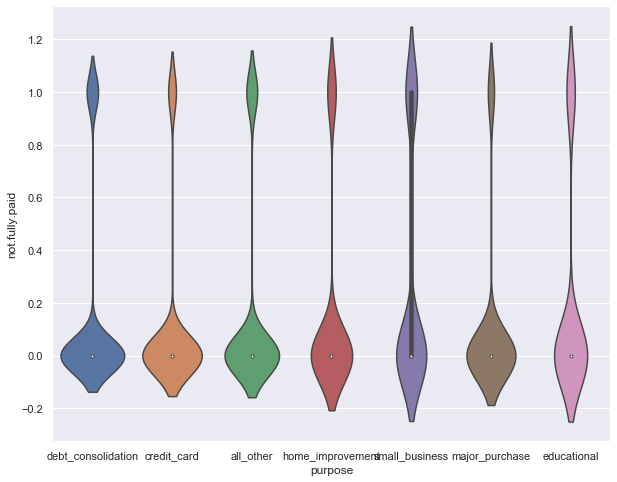

In [76]:
sns.violinplot(data = df, x='purpose', y='not.fully.paid')

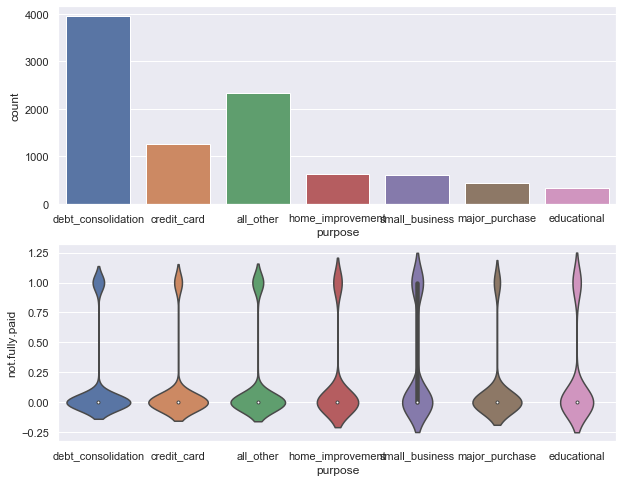

In [133]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df, x = 'purpose', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.violinplot(data = df, x='purpose', y='not.fully.paid' , ax = ax2)

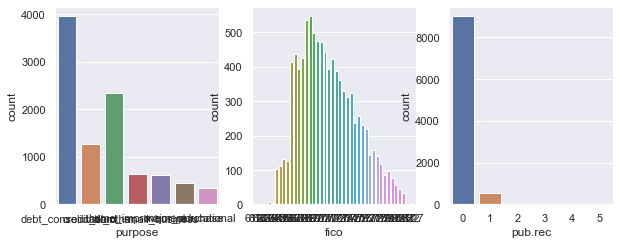

In [134]:
fig = plt.figure()

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = df, x = 'purpose', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = df, x = 'fico', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = df, x = 'pub.rec', ax=ax3)

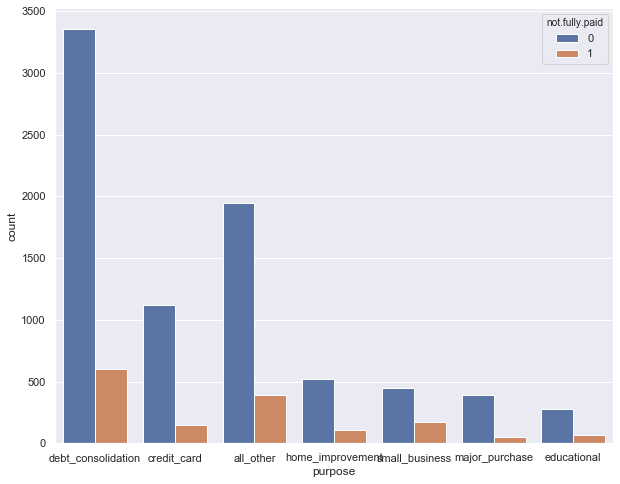

In [73]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data = df, x='purpose', hue='not.fully.paid')

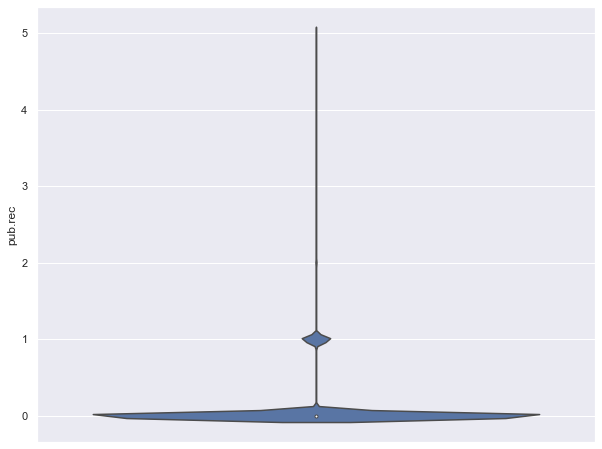

In [78]:
sns.violinplot(y=df["pub.rec"], hue=df["not.fully.paid"])

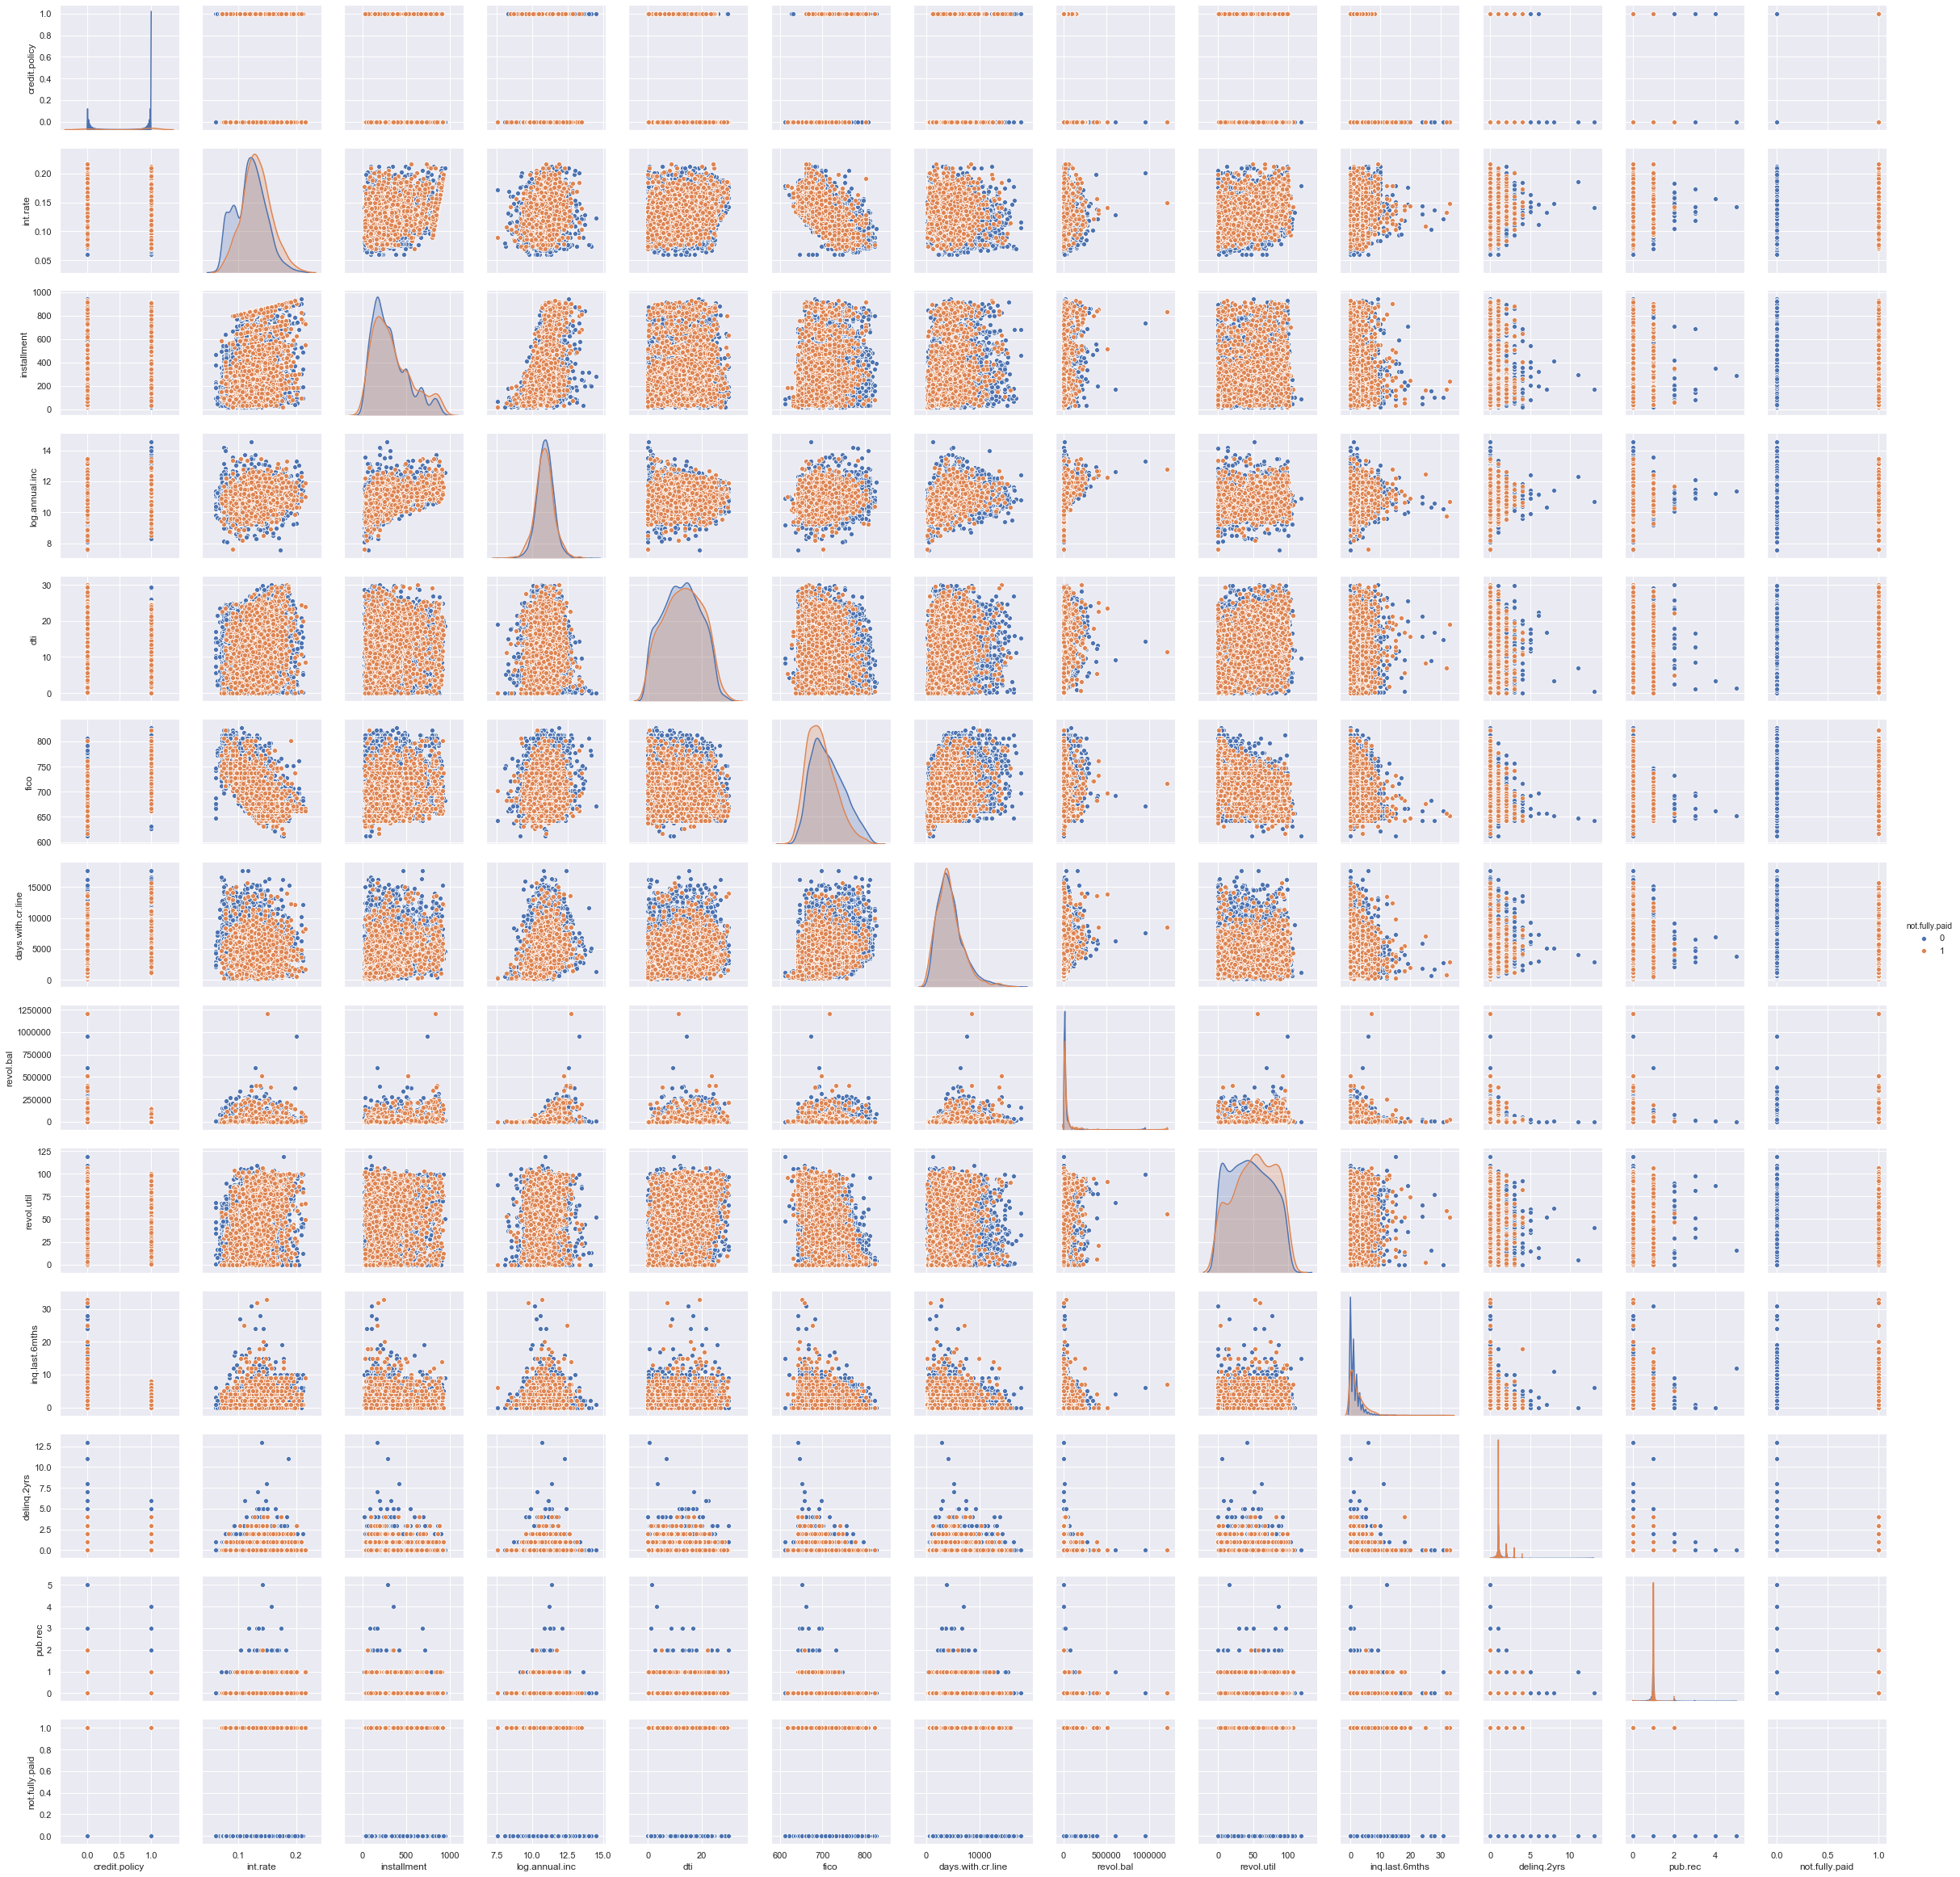

In [79]:
sns.pairplot(data=df, hue='not.fully.paid')

In [23]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lb_make = LabelEncoder()
df["purpose"] = lb_make.fit_transform(df["purpose"])
df[["purpose"]].head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [109]:
df_x=pd.read_csv('input.csv', delimiter=',')
df_y=pd.read_csv('output.csv', delimiter=',')

df_x = df_x.astype('float32')
df_y = df_y.astype('float32')

In [110]:
print(df_x.shape[0], 'inputs')
print(df_y.shape[0], 'labels')

9577 inputs
9577 labels


In [111]:
train_size = 0.75

from math import floor, ceil

train_cnt = floor(df_x.shape[0] * train_size)
x_train = df_x[0: train_cnt]
y_train = df_y[0: train_cnt]
x_test = df_x[train_cnt:]
y_test = df_y[train_cnt:]


In [112]:
print(np.random.seed(777))

None


In [114]:
model = Sequential()
model.add(Dense(12, input_dim=18, activation='relu'))
model.add(Dense(18, activation= 'relu'))
model.add(Dense(2, activation= 'sigmoid'))

In [115]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [119]:
model.fit(x_train, y_train,batch_size=5,epochs=199,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Train on 7182 samples, validate on 2395 samples
Epoch 1/199
7182/7182 [==============================] - 2s 296us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4303 - val_accuracy: 0.9370
Epoch 2/199
7182/7182 [==============================] - 2s 239us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4294 - val_accuracy: 0.9370
Epoch 3/199
7182/7182 [==============================] - 2s 288us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4308 - val_accuracy: 0.9370
Epoch 4/199
7182/7182 [==============================] - 2s 308us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4298 - val_accuracy: 0.9370
Epoch 5/199
7182/7182 [==============================] - 2s 274us/step - loss: 0.2414 - accuracy: 0.9347 - val_loss: 0.4270 - val_accuracy: 0.9374
Epoch 6/199
7182/7182 [==============================] - 3s 409us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4271 - val_accuracy: 0.9374
Epoch 7/199
7182/7182 [==============================] - 3s 419us/step

7182/7182 [==============================] - 4s 626us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4270 - val_accuracy: 0.9372
Epoch 57/199
7182/7182 [==============================] - 5s 637us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4282 - val_accuracy: 0.9370
Epoch 58/199
7182/7182 [==============================] - 4s 500us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4271 - val_accuracy: 0.9372
Epoch 59/199
7182/7182 [==============================] - 4s 515us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4272 - val_accuracy: 0.9370
Epoch 60/199
7182/7182 [==============================] - 5s 746us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4292 - val_accuracy: 0.9370
Epoch 61/199
7182/7182 [==============================] - 4s 559us/step - loss: 0.2416 - accuracy: 0.9347 - val_loss: 0.4270 - val_accuracy: 0.9372
Epoch 62/199
7182/7182 [==============================] - 4s 507us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4304 

7182/7182 [==============================] - 3s 433us/step - loss: 0.2416 - accuracy: 0.9347 - val_loss: 0.4284 - val_accuracy: 0.9370
Epoch 112/199
7182/7182 [==============================] - 2s 220us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4298 - val_accuracy: 0.9370
Epoch 113/199
7182/7182 [==============================] - 2s 250us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4283 - val_accuracy: 0.9370
Epoch 114/199
7182/7182 [==============================] - 2s 271us/step - loss: 0.2414 - accuracy: 0.9347 - val_loss: 0.4291 - val_accuracy: 0.9370
Epoch 115/199
7182/7182 [==============================] - 2s 286us/step - loss: 0.2414 - accuracy: 0.9347 - val_loss: 0.4304 - val_accuracy: 0.9370
Epoch 116/199
7182/7182 [==============================] - 3s 469us/step - loss: 0.2416 - accuracy: 0.9347 - val_loss: 0.4274 - val_accuracy: 0.9374
Epoch 117/199
7182/7182 [==============================] - 2s 347us/step - loss: 0.2413 - accuracy: 0.9347 - val_loss: 0

7182/7182 [==============================] - 2s 248us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4276 - val_accuracy: 0.9374
Epoch 167/199
7182/7182 [==============================] - 3s 375us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4306 - val_accuracy: 0.9370
Epoch 168/199
7182/7182 [==============================] - 2s 217us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4293 - val_accuracy: 0.9370
Epoch 169/199
7182/7182 [==============================] - 1s 208us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4307 - val_accuracy: 0.9370
Epoch 170/199
7182/7182 [==============================] - 1s 209us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0.4300 - val_accuracy: 0.9370
Epoch 171/199
7182/7182 [==============================] - 1s 209us/step - loss: 0.2416 - accuracy: 0.9347 - val_loss: 0.4281 - val_accuracy: 0.9370
Epoch 172/199
7182/7182 [==============================] - 1s 206us/step - loss: 0.2415 - accuracy: 0.9347 - val_loss: 0

In [118]:
scores_test = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

2395/2395 [==============================] - 0s 15us/step

accuracy: 93.67%
